In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [45]:
type(data)

dict

In [46]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [47]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\yamin\AppData\Local\Temp\ipykernel_4424\4244551283.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10469,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19488481.00000,19488481.00000,False,NaN,1,NaN,NaN,None,2023-09-17T17:32:00.000Z,26521.23840,6594837852.68148,-26.85200,-0.05587,-0.17646,3.16952,2.39769,-11.45151,-0.25481,516858650650.52667,48.98570,556946006395.31995,None,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:37:27.603903
1,1027,Ethereum,ETH,ethereum,7394,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120224406.72280,120224406.72280,True,NaN,2,NaN,NaN,None,2023-09-17T17:32:00.000Z,1624.37278,2764093223.57075,-25.56900,-0.16804,-0.85381,0.99722,-1.90030,-14.81716,-5.90079,195289253551.54749,18.50870,195289253551.54999,None,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:37:27.603903
2,825,Tether USDt,USDT,tether,62391,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83041923535.66393,85437198726.47841,True,NaN,3,NaN,NaN,None,2023-09-17T17:32:00.000Z,1.00027,12079866861.57131,-29.29450,-0.00926,0.01134,0.05431,0.10455,0.02387,0.07828,83064381265.23831,7.87490,85460304230.58000,None,2023-09-17T17:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-17 17:37:27.603903
3,1839,BNB,BNB,bnb,1625,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153848238.55392,153848238.55392,False,NaN,4,NaN,NaN,None,2023-09-17T17:32:00.000Z,215.63637,404352828.20597,-33.42370,-0.16491,0.47571,1.80824,-0.37778,-10.68332,-10.70651,33175275891.53333,3.14440,33175275891.53000,None,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:37:27.603903
4,52,XRP,XRP,xrp,1086,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53175400720.00000,99988428101.00000,False,NaN,5,NaN,NaN,None,2023-09-17T17:32:00.000Z,0.49826,452975892.41092,-26.62500,-0.13732,-0.74305,0.26336,0.03899,-38.27425,1.43783,26495425244.44165,2.51190,49826470295.83000,None,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:37:27.603903
5,3408,USD Coin,USDC,usd-coin,14109,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26166082307.54519,26166082307.54519,False,NaN,6,NaN,NaN,None,2023-09-17T17:32:00.000Z,1.00005,1509777192.00022,-29.22180,-0.01663,-0.00168,-0.00167,0.01319,0.00246,0.01191,26167435892.14542,2.48000,26167435892.15000,None,2023-09-17T17:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-17 17:37:27.603903
6,2010,Cardano,ADA,cardano,934,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35108281207.07500,36167977941.12500,False,NaN,7,NaN,NaN,None,2023-09-17T17:32:00.000Z,0.24816,77610263.57660,-28.41400,-0.34902,-0.70628,0.62371,-5.11825,-20.43196,-4.61111,8712598885.49111,0.82570,11167363834.61000,None,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:37:27.603903
7,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,141046356383.70526,141046356383.70520,True,NaN,8,NaN,NaN,None,2023-09-17T17:32:00.000Z,0.06174,139784259.44405,-13.09870,-0.22622,-0.69953,0.89746,-1.42134,-12.03858,-0.58014,8707873557.58454,0.82530,8707873557.58000,None,2023-09-17T17:3

In [48]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


In [49]:
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

C:\Users\yamin\AppData\Local\Temp\ipykernel_4424\4134504636.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\yamin\AppData\Local\Temp\ipykernel_4424\4134504636.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


In [50]:
 # Use this if you want to create a csv and append data
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

if not os.path.isfile(r'D:\alex\API.csv'):
    df.to_csv(r'D:\alex\API.csv', header='column_names')
else:
    df.to_csv(r'D:\alex\API.csv', mode='a', header=False)
    
df = pd.read_csv(r'D:\alex\API.csv')

C:\Users\yamin\AppData\Local\Temp\ipykernel_4424\3138572041.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


In [51]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [53]:
df72 = pd.read_csv(r'D:\alex\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10469,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19488481.00000,19488481.00000,False,NaN,1,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,26521.23840,6594837852.68148,-26.85200,-0.05587,-0.17646,3.16952,2.39769,-11.45151,-0.25481,516858650650.52667,48.98570,556946006395.31995,NaN,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:34:12.468750
1,1,1027,Ethereum,ETH,ethereum,7394,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120224406.72280,120224406.72280,True,NaN,2,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,1624.37278,2764093223.57075,-25.56900,-0.16804,-0.85381,0.99722,-1.90030,-14.81716,-5.90079,195289253551.54749,18.50870,195289253551.54999,NaN,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:34:12.468750
2,2,825,Tether USDt,USDT,tether,62391,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83041923535.66393,85437198726.47841,True,NaN,3,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,1.00027,12079866861.57131,-29.29450,-0.00926,0.01134,0.05431,0.10455,0.02387,0.07828,83064381265.23831,7.87490,85460304230.58000,NaN,2023-09-17T17:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-17 17:34:12.468750
3,3,1839,BNB,BNB,bnb,1625,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153848238.55392,153848238.55392,False,NaN,4,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,215.63637,404352828.20597,-33.42370,-0.16491,0.47571,1.80824,-0.37778,-10.68332,-10.70651,33175275891.53333,3.14440,33175275891.53000,NaN,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:34:12.468750
4,4,52,XRP,XRP,xrp,1086,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53175400720.00000,99988428101.00000,False,NaN,5,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,0.49826,452975892.41092,-26.62500,-0.13732,-0.74305,0.26336,0.03899,-38.27425,1.43783,26495425244.44165,2.51190,49826470295.83000,NaN,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:34:12.468750
5,5,3408,USD Coin,USDC,usd-coin,14109,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,26166082307.54519,26166082307.54519,False,NaN,6,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,1.00005,1509777192.00022,-29.22180,-0.01663,-0.00168,-0.00167,0.01319,0.00246,0.01191,26167435892.14542,2.48000,26167435892.15000,NaN,2023-09-17T17:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-17 17:34:12.468750
6,6,2010,Cardano,ADA,cardano,934,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35108281207.07500,36167977941.12500,False,NaN,7,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,0.24816,77610263.57660,-28.41400,-0.34902,-0.70628,0.62371,-5.11825,-20.43196,-4.61111,8712598885.49111,0.82570,11167363834.61000,NaN,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:34:12.468750
7,7,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,141046356383.70526,141046356383.70520,True,NaN,8,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,0.06174,139784259.44405,-13.09870,-0.22622,-0.69953,0.89746,-1.42134,-12.03858,-0.58014,8707873557.58454,0.82530,8707873557.58000,NaN,2023

In [54]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10469,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19488481.00000,19488481.00000,False,NaN,1,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,26521.23840,6594837852.68148,-26.85200,-0.05587,-0.17646,3.16952,2.39769,-11.45151,-0.25481,516858650650.52667,48.98570,556946006395.31995,NaN,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:34:12.468750
1,1,1027,Ethereum,ETH,ethereum,7394,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120224406.72280,120224406.72280,True,NaN,2,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,1624.37278,2764093223.57075,-25.56900,-0.16804,-0.85381,0.99722,-1.90030,-14.81716,-5.90079,195289253551.54749,18.50870,195289253551.54999,NaN,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:34:12.468750
2,2,825,Tether USDt,USDT,tether,62391,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83041923535.66393,85437198726.47841,True,NaN,3,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,1.00027,12079866861.57131,-29.29450,-0.00926,0.01134,0.05431,0.10455,0.02387,0.07828,83064381265.23831,7.87490,85460304230.58000,NaN,2023-09-17T17:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-17 17:34:12.468750
3,3,1839,BNB,BNB,bnb,1625,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153848238.55392,153848238.55392,False,NaN,4,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,215.63637,404352828.20597,-33.42370,-0.16491,0.47571,1.80824,-0.37778,-10.68332,-10.70651,33175275891.53333,3.14440,33175275891.53000,NaN,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:34:12.468750
4,4,52,XRP,XRP,xrp,1086,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53175400720.00000,99988428101.00000,False,NaN,5,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,0.49826,452975892.41092,-26.62500,-0.13732,-0.74305,0.26336,0.03899,-38.27425,1.43783,26495425244.44165,2.51190,49826470295.83000,NaN,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:34:12.468750
5,5,3408,USD Coin,USDC,usd-coin,14109,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,26166082307.54519,26166082307.54519,False,NaN,6,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,1.00005,1509777192.00022,-29.22180,-0.01663,-0.00168,-0.00167,0.01319,0.00246,0.01191,26167435892.14542,2.48000,26167435892.15000,NaN,2023-09-17T17:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-17 17:34:12.468750
6,6,2010,Cardano,ADA,cardano,934,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35108281207.07500,36167977941.12500,False,NaN,7,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,0.24816,77610263.57660,-28.41400,-0.34902,-0.70628,0.62371,-5.11825,-20.43196,-4.61111,8712598885.49111,0.82570,11167363834.61000,NaN,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:34:12.468750
7,7,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,141046356383.70526,141046356383.70520,True,NaN,8,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,0.06174,139784259.44405,-13.09870,-0.22622,-0.69953,0.89746,-1.42134,-12.03858,-0.58014,8707873557.58454,0.82530,8707873557.58000,NaN,2023

In [55]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [56]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10469,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19488481.00000,19488481.00000,False,NaN,1,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,26521.23840,6594837852.68148,-26.85200,-0.05587,-0.17646,3.16952,2.39769,-11.45151,-0.25481,516858650650.52667,48.98570,556946006395.31995,NaN,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:34:12.468750
1,1,1027,Ethereum,ETH,ethereum,7394,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120224406.72280,120224406.72280,True,NaN,2,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,1624.37278,2764093223.57075,-25.56900,-0.16804,-0.85381,0.99722,-1.90030,-14.81716,-5.90079,195289253551.54749,18.50870,195289253551.54999,NaN,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:34:12.468750
2,2,825,Tether USDt,USDT,tether,62391,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83041923535.66393,85437198726.47841,True,NaN,3,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,1.00027,12079866861.57131,-29.29450,-0.00926,0.01134,0.05431,0.10455,0.02387,0.07828,83064381265.23831,7.87490,85460304230.58000,NaN,2023-09-17T17:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-17 17:34:12.468750
3,3,1839,BNB,BNB,bnb,1625,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153848238.55392,153848238.55392,False,NaN,4,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,215.63637,404352828.20597,-33.42370,-0.16491,0.47571,1.80824,-0.37778,-10.68332,-10.70651,33175275891.53333,3.14440,33175275891.53000,NaN,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:34:12.468750
4,4,52,XRP,XRP,xrp,1086,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53175400720.00000,99988428101.00000,False,NaN,5,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,0.49826,452975892.41092,-26.62500,-0.13732,-0.74305,0.26336,0.03899,-38.27425,1.43783,26495425244.44165,2.51190,49826470295.83000,NaN,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:34:12.468750
5,5,3408,USD Coin,USDC,usd-coin,14109,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,26166082307.54519,26166082307.54519,False,NaN,6,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,1.00005,1509777192.00022,-29.22180,-0.01663,-0.00168,-0.00167,0.01319,0.00246,0.01191,26167435892.14542,2.48000,26167435892.15000,NaN,2023-09-17T17:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-17 17:34:12.468750
6,6,2010,Cardano,ADA,cardano,934,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35108281207.07500,36167977941.12500,False,NaN,7,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,0.24816,77610263.57660,-28.41400,-0.34902,-0.70628,0.62371,-5.11825,-20.43196,-4.61111,8712598885.49111,0.82570,11167363834.61000,NaN,2023-09-17T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 17:34:12.468750
7,7,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,141046356383.70526,141046356383.70520,True,NaN,8,NaN,NaN,NaN,2023-09-17T17:32:00.000Z,0.06174,139784259.44405,-13.09870,-0.22622,-0.69953,0.89746,-1.42134,-12.03858,-0.58014,8707873557.58454,0.82530,8707873557.58000,NaN,2023

In [57]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.05587,-0.17646,3.16952,2.39769,-11.45151,-0.25481
Ethereum,-0.16804,-0.85381,0.99722,-1.90030,-14.81716,-5.90079
Tether USDt,-0.00926,0.01134,0.05431,0.10455,0.02387,0.07828
BNB,-0.16491,0.47571,1.80824,-0.37778,-10.68332,-10.70651
XRP,-0.13732,-0.74305,0.26336,0.03899,-38.27425,1.43783
USD Coin,-0.01663,-0.00168,-0.00167,0.01319,0.00246,0.01191
Cardano,-0.34902,-0.70628,0.62371,-5.11825,-20.43196,-4.61111
Dogecoin,-0.22622,-0.69953,0.89746,-1.42134,-12.03858,-0.58014
Toncoin,0.89102,3.38300,33.08042,80.25598,70.79515,65.87025


In [58]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.05587
             quote.USD.percent_change_24h    -0.17646
             quote.USD.percent_change_7d      3.16952
             quote.USD.percent_change_30d     2.39769
             quote.USD.percent_change_60d   -11.45151
             quote.USD.percent_change_90d    -0.25481
Ethereum     quote.USD.percent_change_1h     -0.16804
             quote.USD.percent_change_24h    -0.85381
             quote.USD.percent_change_7d      0.99722
             quote.USD.percent_change_30d    -1.90030
             quote.USD.percent_change_60d   -14.81716
             quote.USD.percent_change_90d    -5.90079
Tether USDt  quote.USD.percent_change_1h     -0.00926
             quote.USD.percent_change_24h     0.01134
             quote.USD.percent_change_7d      0.05431
             quote.USD.percent_change_30d     0.10455
             quote.USD.percent_change_60d     0.02387
             quote.USD.percent_change_90

In [59]:
type(df4)

pandas.core.series.Series

In [60]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.05587
            quote.USD.percent_change_24h  -0.17646
            quote.USD.percent_change_7d    3.16952
            quote.USD.percent_change_30d   2.39769
            quote.USD.percent_change_60d -11.45151
            quote.USD.percent_change_90d  -0.25481
Ethereum    quote.USD.percent_change_1h   -0.16804
            quote.USD.percent_change_24h  -0.85381
            quote.USD.percent_change_7d    0.99722
            quote.USD.percent_change_30d  -1.90030
            quote.USD.percent_change_60d -14.81716
            quote.USD.percent_change_90d  -5.90079
Tether USDt quote.USD.percent_change_1h   -0.00926
            quote.USD.percent_change_24h   0.01134
            quote.USD.percent_change_7d    0.05431
            quote.USD.percent_change_30d   0.10455
            quote.USD.percent_change_60d   0.02387
            quote.USD.percent_change_90d   0.07828
BNB         quote.USD.percent_change_1h   -0.16491
            quote.USD.percent_change_24h   0.47571
            quote.USD.percent_change_7d    1.80824
            quote.USD.percent_change_30d  -0.37778
            quote.USD.percent_change_60d -10.68332
            quote.USD.percent_change_90d -10.70651
XRP         quote.USD.percent_change_1h   -0.13732
            quote.USD.percent_change_24h  -0.74305
            quote.USD.percent_change_7d    0.26336
            quote.USD.percent_change_30d   0.03899
            quote.USD.percent_change_60d -38.27425
            quote.USD.percent_change_90d   1.43783
USD Coin    quote.USD.percent_change_1h   -0.01663
            quote.USD.percent_change_24h  -0.00168
            quote.USD.percent_change_7d   -0.00167
            quote.USD.percent_change_30d   0.01319
            quote.USD.percent_change_60d   0.00246
            quote.USD.percent_change_90d   0.01191
Cardano     quote.USD.percent_change_1h   -0.34902
            quote.USD.percent_change_24h  -0.70628
            quote.USD.percent_change_7d    0.62371
            quote.USD.percent_change_30d  -5.11825
            quote.USD.percent_change_60d -20.43196
            quote.USD.percent_change_90d  -4.61111
Dogecoin    quote.USD.percent_change_1h   -0.22622
            quote.USD.percent_change_24h  -0.69953
            quote.USD.percent_change_7d    0.89746
            quote.USD.percent_change_30d  -1.42134
            quote.USD.percent_change_60d -12.03858
            quote.USD.percent_change_90d  -0.58014
Toncoin     quote.USD.percent_change_1h    0.89102
            quote.USD.percent_change_24h   3.38300
            quote.USD.percent_change_7d   33.08042
            quote.USD.percent_change_30d  80.25598
            quote.USD.percent_change_60d  70.79515
            quote.USD.percent_change_90d  65.87025
Solana      quote.USD.percent_change_1h   -0.30405
            quote.USD.percent_change_24h  -0.75137
            quote.USD.percent_change_7d    5.27344
            quote.USD.percent_change_30d -11.27575
            quote.USD.percent_change_60d -28.54326
            quote.USD.percent_change_90d  20.63023
TRON        quote.USD.percent_change_1h   -0.08647
            quote.USD.percent_change_24h  -0.07106
            quote.USD.percent_change_7d    7.23837
            quote.USD.percent_change_30d  14.72967
            quote.USD.percent_change_60d   4.46582
            quote.USD.percent_change_90d  19.87346
Dai         quote.USD.percent_change_1h    0.00390
            quote.USD.percent_change_24h  -0.03500
            quote.USD.percent_change_7d    0.02795
            quote.USD.percent_change_30d   0.00776
            quote.USD.percent_change_60d  -0.01328
            quote.USD.percent_change_90d  -0.04131
Polkadot    quote.USD.percent_change_1h   -0.35423
            quote.USD.percent_change_24h  -1.26342
            quote.USD.percent_change_7d   -0.68572
            quote.USD.percent_change_30d  -9.07911
            quote.USD.percent_change_60d -20.90468
            quo

In [61]:
df5.count()

values    90
dtype: int64

In [62]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.05587
1,Bitcoin,quote.USD.percent_change_24h,-0.17646
2,Bitcoin,quote.USD.percent_change_7d,3.16952
3,Bitcoin,quote.USD.percent_change_30d,2.39769
4,Bitcoin,quote.USD.percent_change_60d,-11.45151
5,Bitcoin,quote.USD.percent_change_90d,-0.25481
6,Ethereum,quote.USD.percent_change_1h,-0.16804
7,Ethereum,quote.USD.percent_change_24h,-0.85381
8,Ethereum,quote.USD.percent_change_7d,0.99722
9,Ethereum,quote.USD.percent_change_30d,-1.90030


In [63]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.05587
1,Bitcoin,quote.USD.percent_change_24h,-0.17646
2,Bitcoin,quote.USD.percent_change_7d,3.16952
3,Bitcoin,quote.USD.percent_change_30d,2.39769
4,Bitcoin,quote.USD.percent_change_60d,-11.45151
5,Bitcoin,quote.USD.percent_change_90d,-0.25481
6,Ethereum,quote.USD.percent_change_1h,-0.16804
7,Ethereum,quote.USD.percent_change_24h,-0.85381
8,Ethereum,quote.USD.percent_change_7d,0.99722
9,Ethereum,quote.USD.percent_change_30d,-1.90030


In [64]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.05587
1,Bitcoin,24h,-0.17646
2,Bitcoin,7d,3.16952
3,Bitcoin,30d,2.39769
4,Bitcoin,60d,-11.45151
5,Bitcoin,90d,-0.25481
6,Ethereum,quote.USD.percent_change_1h,-0.16804
7,Ethereum,24h,-0.85381
8,Ethereum,7d,0.99722
9,Ethereum,30d,-1.90030


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

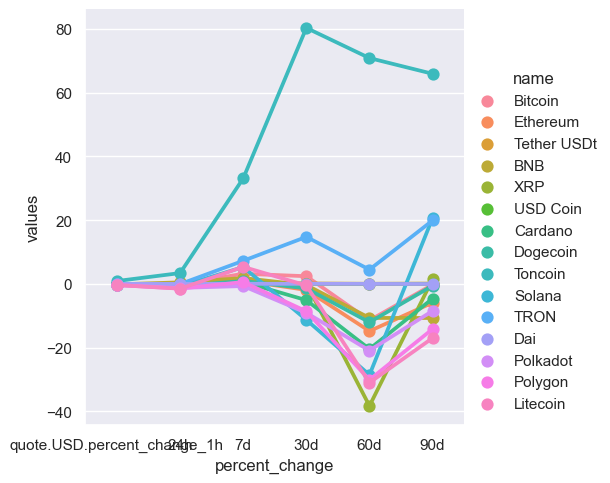

In [66]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [67]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10


,name,quote.USD.price,timestamp
0,Bitcoin,26521.23840,2023-09-17 17:34:12.468750
15,Bitcoin,26521.23840,2023-09-17 17:37:45.001232


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

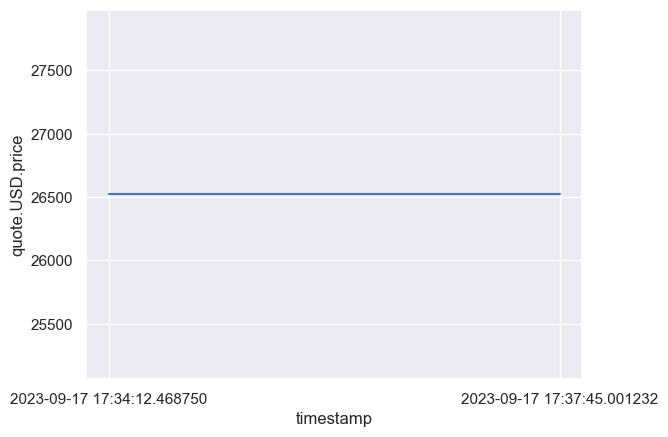

In [68]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)